# Introdução à Estatística (Case Prático)
***

<img src="https://selecao.letscode.com.br/favicon.png" width="40px" height="40px" style="position: absolute; top: 12px; right: 20px;" />

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

## Variáveis utilizadas

### Renda

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

### Idade

Idade do morador na data de referência em anos.

### Altura (elaboração própria)

Altura do morador em metros.

### UF

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

### Sexo

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

### Anos de Estudo

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

### Cor

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

### Importando as bibliotecas e lendo o dataset

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from numpy import mean

sns.set()

In [2]:
df = pd.read_csv('PNAD - 2015.csv')
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## <font color=green>1. Tipos de dados</font>
***

### Variáveis qualitativas ordinais

► Variáveis que podem ser ordenadas ou hierarquizardas
* ###### anos de estudo

### Variáveis qualitativas nominais

► Variáveis que não podem ser ordenadas ou hierarquizardas
* ###### UF
* ###### sexo
* ###### cor

### Variáveis quantitativas discretas

► Variáveis que representam uma contagem onde os valores possíveis formam um conjunto finito ou enumerável.



### Variáveis quantitativas contínuas

► Variáveis que representam uma contagem ou mensuração que assumem valores em uma escala contínua (números reais).
* ###### idade
* ###### renda
* ###### altura

## <font color=green>2. Distribuição de frequências</font>
***

O primeiro passo em um trabalho de análise é o conhecimento do comportamento das variáveis envolvidas no estudo. Utilizando técnicas estatísticas como as análises das <b>DISTRIBUIÇÕES DE FREQUÊNCIAS</b> e <b>HISTOGRAMAS</b> podemos avaliar melhor a forma como os fenômenos em estudo se distribuem.

## <font color=green>2.1 Distribuição de frequências para variáveis qualitativas</font>
***

### Obtenha a tabela e o gráfico de distribuição de frequências para a variável sexo

##### Sexo
###### 0 - Masculino // 1 - Feminino

In [3]:
fi = df['Sexo'].value_counts()
fp = df['Sexo'].value_counts(normalize=True) * 100

In [4]:
df_freq_sexo = pd.DataFrame({'Frequência Absoluta': fi, 'Frequência Percentual (%)': fp}).rename_axis('Sexo').reset_index()
df_freq_sexo

,Sexo,Frequência Absoluta,Frequência Percentual (%)
0,0,53250,69.299844
1,1,23590,30.700156


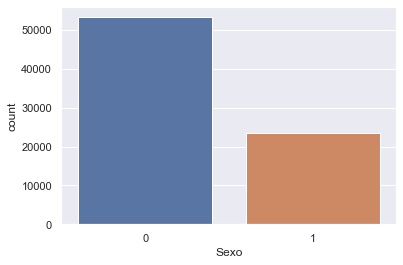

In [5]:
sns.countplot(x=df['Sexo']);

### Obtenha a tabela e o gráfico de distribuição de frequências para a variável Sexo cruzada com os dados de Cor

In [6]:
df_freq_cruzada = pd.DataFrame()
df_freq_cruzada['Cor'] = df['Cor']
df_freq_cruzada['Sexo'] = df['Sexo']

In [7]:
df_freq_mas = pd.DataFrame(df_freq_cruzada[df_freq_cruzada['Sexo'] == 0].groupby(by='Cor').size().to_frame('Frequência Absoluta (Male)').reset_index())
df_freq_mas['Frequência Percentual % (Male)'] = (df_freq_mas['Frequência Absoluta (Male)']*100) / df_freq_mas['Frequência Absoluta (Male)'].sum()

In [8]:
df_freq_fem =pd.DataFrame(df_freq_cruzada[df_freq_cruzada['Sexo'] == 1].groupby(by='Cor').size().to_frame('Frequência Absoluta (Female)').reset_index())
df_freq_fem['Frequência Percentual % (Female)'] = (df_freq_fem['Frequência Absoluta (Female)']*100) / df_freq_fem['Frequência Absoluta (Female)'].sum()

In [9]:
df_cruzado = pd.merge(df_freq_mas,df_freq_fem)
df_cruzado

,Cor,Frequência Absoluta (Male),Frequência Percentual % (Male),Frequência Absoluta (Female),Frequência Percentual % (Female)
0,0,256,0.480751,101,0.428148
1,2,22194,41.678873,9621,40.784231
2,4,5502,10.332394,2889,12.246715
3,6,235,0.441315,117,0.495973
4,8,25063,47.066667,10862,46.044934


In [10]:
pd.crosstab(df['Sexo'], df['Cor'])

Cor,0,2,4,6,8
Sexo,,,,,
0,256,22194,5502,235,25063
1,101,9621,2889,117,10862


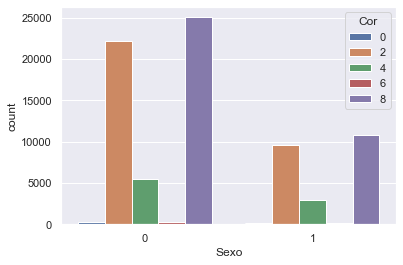

In [11]:
sns.countplot(x=df['Sexo'], hue=df['Cor']);

## <font color=green>2.2 Distribuição de frequências para variáveis quantitativas (classes personalizadas)</font>
***

### Passo 1 - Especificar os limites de cada classe

Utilizar a seguinte classificação:

<b>A</b> ► Acima de 20 SM

<b>B</b> ► De 10 a 20 SM

<b>C</b> ► De 4 a 10 SM

<b>D</b> ► De 2 a 4 SM

<b>E</b> ► Até 2 SM

onde <b>SM</b> é o valor do salário mínimo na época. Em nosso caso, <b>R$ 788,00</b> (considerando o ano de 2015):

<b>A</b> ► Acima de 15.760

<b>B</b> ► De 7.880 a 15.760

<b>C</b> ► De 3.152 a 7.880

<b>D</b> ► De 1.576 a 3.152

<b>E</b> ► Até 1.576


#### 1. Criar um dataframe que contenha essas classes personalizadas, utilizando o `pd.cut`.

In [12]:
%%time

classificacao = [''] * df.shape[0]

for i in range(df.shape[0]):
    salario = df.loc[i, 'Renda']
    if (salario <= 1576):
        classificacao[i] = 'E'
    elif (salario <= 3152):
        classificacao[i] = 'D'
    elif (salario <= 7880):
        classificacao[i] = 'C'
    elif (salario <= 15760):
        classificacao[i] = 'B'
    else:
        classificacao[i] = 'A'
        
df['Classificacao'] = classificacao

Wall time: 802 ms


In [13]:
%%time

df_class = pd.DataFrame(pd.cut(df['Renda'], 
                        bins=[df['Renda'].min(), 1576, 3152, 7880, 15760, 
                        df['Renda'].max()], 
                        include_lowest=True).value_counts()).reset_index().rename(columns= {'index':'Intervalo',
                                                                                            'Renda': 'Num Pessoas'})
df_class['Classificacao'] = ['E', 'D', 'C', 'B', 'A']
df_class

Wall time: 8.99 ms


,Intervalo,Num Pessoas,Classificacao
0,"(-0.001, 1576.0]",49755,E
1,"(1576.0, 3152.0]",16700,D
2,"(3152.0, 7880.0]",7599,C
3,"(7880.0, 15760.0]",2178,B
4,"(15760.0, 200000.0]",608,A


#### 2. Criar a tabela de distribuição de frequências do dataframe obtido acima.

In [14]:
fi = df['Classificacao'].value_counts()
fp = df['Classificacao'].value_counts(normalize=True) * 100
df_freq_class = pd.DataFrame({'Frequência Absoluta': fi, 'Frequência Percentual (%)': fp}).rename_axis('Classificacao').reset_index()
df_freq_class

,Classificacao,Frequência Absoluta,Frequência Percentual (%)
0,E,49755,64.751432
1,D,16700,21.733472
2,C,7599,9.889381
3,B,2178,2.834461
4,A,608,0.791255


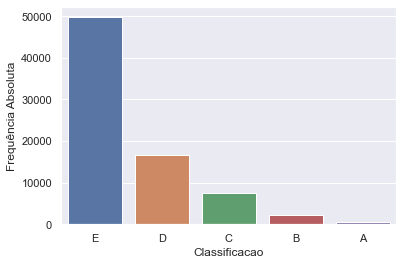

In [15]:
sns.barplot(x=df_freq_class['Classificacao'], y=df_freq_class['Frequência Absoluta']);

## <font color=green>2.3 Distribuição de frequências para variáveis quantitativas (classes de amplitude fixa)</font>
***

Obtenha a tabela e o gráfico de distribuições de frequências da variável de renda, mas, dessa vez, utilizando a Regra de Sturges para definir as classes de amplitude fixa.

#### 1. Definindo o número de classes e criando o dataframe com as classes

#### Regra de Sturges

$$k = 1 + \frac{10}{3}\log_{10}n$$

In [16]:
n = df.shape[0]
n

76840

In [17]:
k = 1 + (10/3) * np.log10(n)
k

17.285291187298853

In [18]:
k = round(k)
k

17

#### 2. Criando a tabela e o gráfico de distribução de frequências

In [19]:
df_class_sturges = pd.DataFrame(pd.cut(df['Renda'], bins=k,
                                include_lowest=True).value_counts()).reset_index().rename(columns= {'index':'Intervalo',
                                                                                            'Renda': 'Num Pessoas'})

df_class_sturges['Classificacao'] = [i for i in range(1,18)]
df_class_sturges.head(10)

,Intervalo,Num Pessoas,Classificacao
0,"(-200.001, 11764.706]",75594,1
1,"(11764.706, 23529.412]",1022,2
2,"(23529.412, 35294.118]",169,3
3,"(35294.118, 47058.824]",19,4
4,"(47058.824, 58823.529]",16,5
5,"(94117.647, 105882.353]",6,6
6,"(58823.529, 70588.235]",5,7
7,"(70588.235, 82352.941]",4,8
8,"(188235.294, 200000.0]",3,9
9,"(82352.941, 94117.647]",1,10


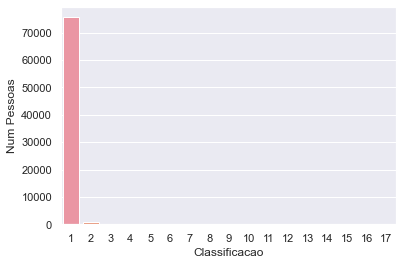

In [20]:
sns.barplot(x=df_class_sturges['Classificacao'], y=df_class_sturges['Num Pessoas']);

## 3. Medidas de Tendência Central</font>
***

#### 3.1 Média aritmética

Calcule a média aritmética das variáveis `Anos de Estudo`, `Idade`, `Renda` e `Altura`.

In [22]:
df['Anos de Estudo'].mean()

9.469664237376367

In [23]:
df['Idade'].mean()

44.07142113482561

In [24]:
df['Renda'].mean()

2000.3831988547631

In [25]:
df['Altura'].mean()

1.6995124540575741

#### 3.2 Mediana

Calcule a mediana das variáveis `Anos de Estudo`, `Idade`, `Renda` e `Altura`.

In [29]:
df['Anos de Estudo'].median()

11.0

In [30]:
df['Idade'].median()

43.0

In [31]:
df['Renda'].median()

1200.0

In [32]:
df['Altura'].median()

1.6993247325

#### 3.3. Moda

Calcule a moda daquelas variáveis para as quais você imagina que faz sentido obter essa informação (com base no que vimos na aula).

In [33]:
df['Anos de Estudo'].mode()

0    12
dtype: int64

In [34]:
df['Idade'].mode()

0    40
dtype: int64

## <font color=green>3.4 Relação entre média, mediana e moda</font>
***

Como fizemos durante a aula, avalie a relação entre a média, mediana e moda de algumas variáveis do seu conjunto de dados.

<img src='https://caelum-online-public.s3.amazonaws.com/1177-estatistica-parte1/01/img004.png' width='80%'>

### Avalie a variável `Renda`

In [35]:
df['Renda'].mean()

2000.3831988547631

In [36]:
df['Renda'].median()

1200.0

In [37]:
df['Renda'].mode()

0    788
dtype: int64

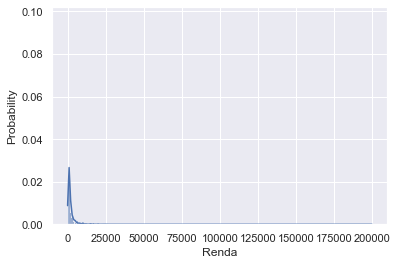

In [39]:
sns.histplot(x=df['Renda'], kde=True, stat='probability');
#assimetria a direita

***

### Avalie a variável `Altura`

In [40]:
df['Altura'].mean()

1.6995124540575741

In [41]:
df['Altura'].median()

1.6993247325

In [42]:
df['Altura'].mode()

0    1.568128
1    1.671225
2    1.681659
3    1.692977
4    1.708163
5    1.708370
6    1.753842
7    1.779073
8    1.796462
dtype: float64

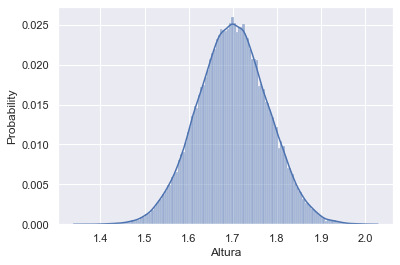

In [43]:
sns.histplot(x=df['Altura'], kde=True, stat='probability');
#distribuicao normal

***

### Avalie a variável `Anos de estudo`

In [44]:
df['Anos de Estudo'].mean()

9.469664237376367

In [45]:
df['Anos de Estudo'].median()

11.0

In [46]:
df['Anos de Estudo'].mode()

0    12
dtype: int64

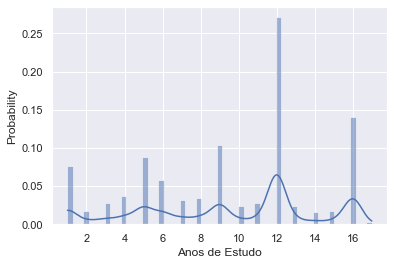

In [50]:
sns.histplot(x=df['Anos de Estudo'], kde=True, stat='probability');
#assimetria a esquerda

## 4. Medidas Separatrizes
***

### 4.1 Quartis, decis e percentis

Calcule os quartis, decis e percentis para a variável `Renda`.

Observe qual o percentual da população brasileira que recebe até um salário minimo.

In [51]:
df['Renda'].quantile([0.25, 0.5, 0.75])

0.25     788.0
0.50    1200.0
0.75    2000.0
Name: Renda, dtype: float64

In [52]:
df['Renda'].quantile([i/10 for i in range(1, 10)])

0.1     350.0
0.2     788.0
0.3     800.0
0.4    1000.0
0.5    1200.0
0.6    1500.0
0.7    1900.0
0.8    2500.0
0.9    4000.0
Name: Renda, dtype: float64

In [53]:
df['Renda'].quantile([i/100 for i in range(1, 100)]).head()

0.01      0.0
0.02      0.0
0.03      0.0
0.04     50.0
0.05    100.0
Name: Renda, dtype: float64

### 4.2 Boxplot

Crie o boxplot para as variáveis `Renda`, `Altura`.

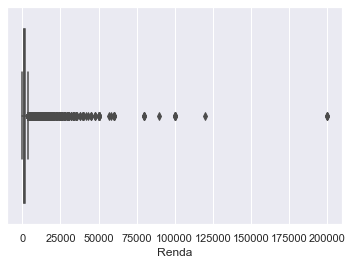

In [56]:
sns.boxplot(x=df['Renda']);

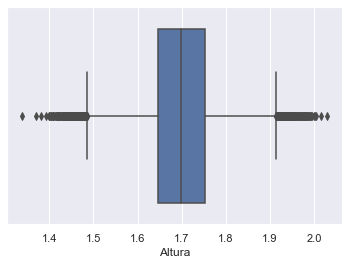

In [57]:
sns.boxplot(x=df['Altura']);

# <font color=green>5. Medidas de Dispersão</font>
***

Obtenha a variância e o desvio padrão das variáveis quantitativas do conjunto de dados. Em seguida, utilize o `seaborn` para plotar um gráfico de barras que exiba a média dessas variáveis quantitativas, em função da Unidade Federativa. Com o `seaborn` você também irá conseguir visualizar o desvio padrão da média para cada barra.

In [58]:
df.head(2)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Classificacao
0,11,0,23,8,12,800,1.603808,E
1,11,1,23,2,12,1150,1.739790,E


In [59]:
df['Idade'].var()

155.76496363581094

In [60]:
df['Idade'].std()

12.48058346535974

In [61]:
df['Anos de Estudo'].var()

20.610956510851576

In [62]:
df['Anos de Estudo'].std()

4.539929130597919

In [63]:
df['Renda'].var()

11044906.006217021

In [64]:
df['Renda'].std()

3323.3877303464037

In [65]:
df['Altura'].var()

0.006354868656686795

In [66]:
df['Altura'].std()

0.07971743006825292

In [89]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Classificacao
0,11,0,23,8,12,800,1.603808,E
1,11,1,23,2,12,1150,1.739790,E
2,11,1,35,8,15,880,1.760444,E
3,11,0,46,2,6,3500,1.783158,C
4,11,1,47,8,9,150,1.690631,E


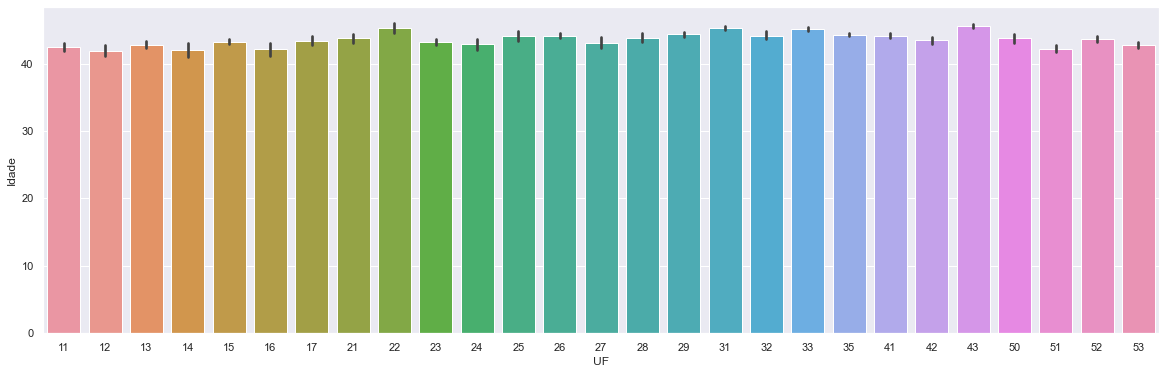

In [72]:
sns.set(rc={"figure.figsize":(20, 6)})
fig=sns.barplot(x=df['UF'], y=df['Idade'], estimator = mean);

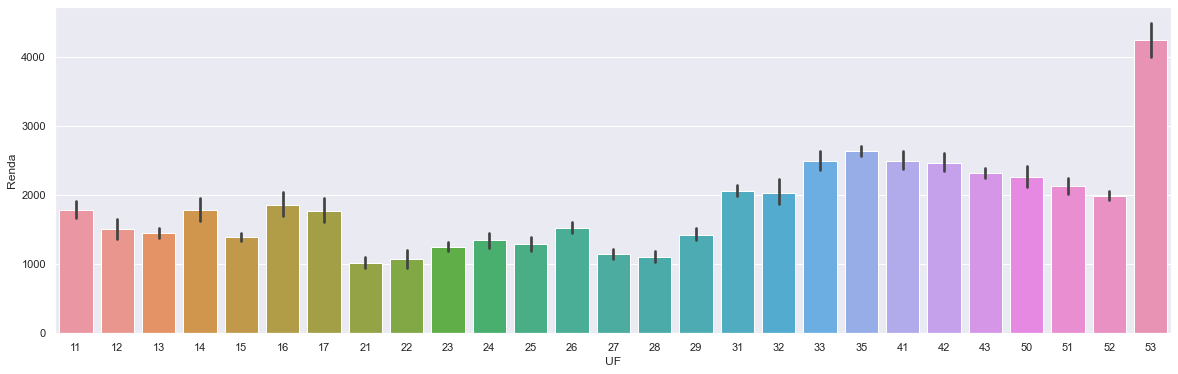

In [75]:
sns.set(rc={"figure.figsize":(20, 6)})
fig2=sns.barplot(x=df['UF'], y=df['Renda'], estimator = mean);

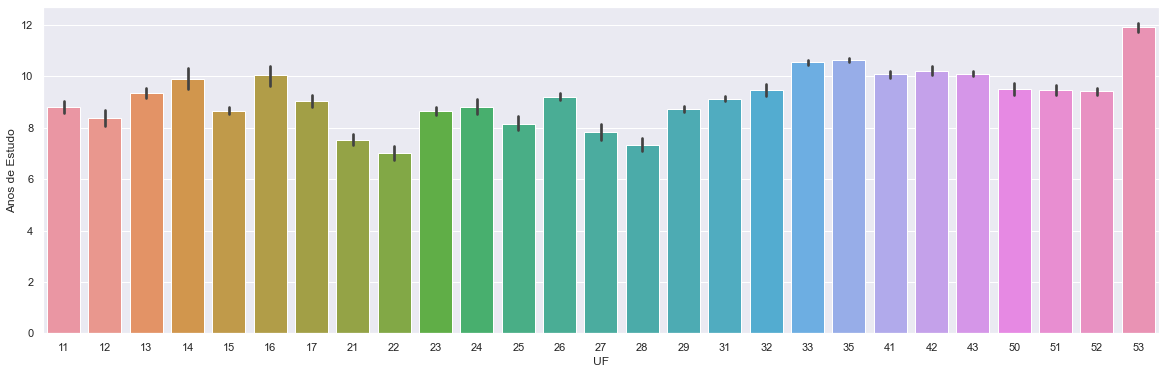

In [76]:
sns.set(rc={"figure.figsize":(20, 6)})
fig3=sns.barplot(x=df['UF'], y=df['Anos de Estudo'], estimator = mean);

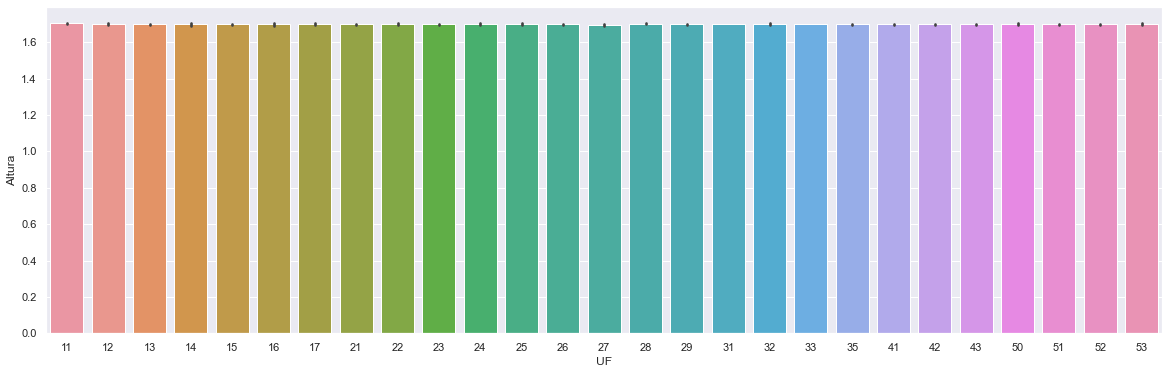

In [77]:
sns.set(rc={"figure.figsize":(20, 6)})
fig4=sns.barplot(x=df['UF'], y=df['Altura'], estimator = mean);